## Претурање вода во садови

Имате на располагање 3 садови. Нивниот капацитет е 5, 8 и 10 соодветно.  На почетокот сите садови се празни. Задачата е да претурите 1 литар во садот од 5 литри. Можете да претурате вода меѓу садовите, но не знаете точно колку претурате бидејќи садовите не се обележани. Единствено може да го испразните садот од кој претурате или да го наполните до врв садот во кој претурате. Постои и чешма од која може да надополните некој сад до врвот. Секогаш може да ја истурите водата од некој сад. Скратено: имате на располагање 3 садови. Нивниот капацитет е (x, y, z) соодветно. Почетната состојба е (x_0, y_0, z_0). Задачата е да стигнете до посакуваната состојба.

In [1]:
from collections import deque
from itertools import combinations
from IPython import display

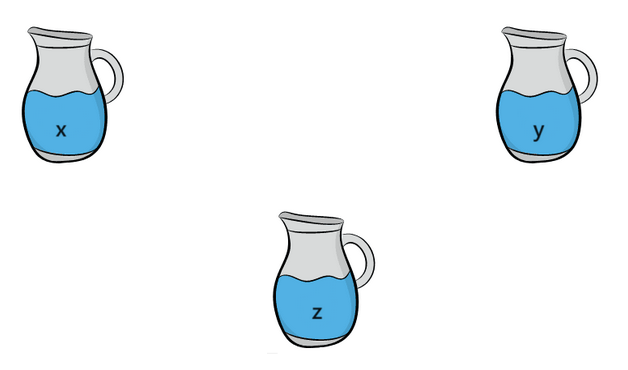

In [2]:
display.Image('images/water_jug.png', width=300)

In [3]:
CAPACITY = (5,8,10)

In [4]:
def transfer(state,index_source,index_sink): 
    avalible_sink = CAPACITY[index_sink] - state[index_sink]
    new_source = max(state[index_source] - avalible_sink,0) 
    new_sink = min(state[index_sink] + state[index_source],CAPACITY[index_sink]) 
    new_state = list(state)
    new_state[index_sink] = new_sink
    new_state[index_source] = new_source
    return tuple(new_state)

In [5]:
def expand_state_bowls(state):
    states = []
    for i in range(len(state)):
        new_state = list(state)
        new_state[i] = CAPACITY[i]
        states.append(tuple(new_state))
    for i in range(len(state)): 
        new_state = list(state)
        new_state[i] = 0
        states.append(tuple(new_state))
    for c1, c2 in combinations(range(len(state)), 2): 
        new_state = transfer(state,c1,c2)
        states.append(new_state)
        new_state = transfer(state,c2,c1) 
        states.append(new_state)
    return states    

In [6]:
def search_path(initial_state, goal_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_state_bowls(state_to_expand):
            if next_state not in visited:
                if next_state == goal_state:
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [7]:
initial_state = (0, 0, 0)
goal_state = (1, 0, 0)
search_path(initial_state, goal_state)

[(0, 0, 0),
 (0, 8, 0),
 (5, 3, 0),
 (0, 3, 0),
 (3, 0, 0),
 (3, 8, 0),
 (3, 0, 8),
 (1, 0, 10),
 (1, 0, 0)]

## Најкратка патека за коњот во шахот

Користејќи ја шаховската фигура коњ, најдете ја најкратката патека од едно до друго поле на шаховската табла.

In [8]:
def valid(x,y): 
    if x >= 0 and x <= 7 and y >= 0 and y <= 7:
        return True
    else:
        return False

In [9]:
def expand_state(state):
    new_states = []
    moves = [(-1,2),(2,-1),(-2,1),(1,-2),(2,1),(1,2),(-1,-2),(-2,-1)] 
    for m,n in moves:
        new_state = list(state)
        new_state[0] = new_state[0] + m 
        new_state[1] = new_state[1] + n
        if valid(new_state[0],new_state[1]):
            new_states.append(tuple(new_state)) 
    return new_states

In [10]:
def search_path(initial_state, goal_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if next_state == goal_state:
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [11]:
search_path((0,0),(3,7))

[(0, 0), (2, 1), (1, 3), (2, 5), (3, 7)]

## Гаси Светла

Разгледуваме игра која се игра самостојно. Правилата на играта се:
- Се игра на табла со димензии `N` по `N`.
- Има празни и полни кругчиња, по едно кругче за секое поле од таблата.
- Се игра исклучиво со притискање на кругчињата.
- Ако се притисне некое кругче:
    - Се менува од празно во полно, или пак обратно, од полно во празно.
    - Неговите соседи се менуваат од празно во полно, или пак обратно, од полно во празно.
    - Соседи на едно кругче се соседните кругчиња кои се наоѓаат над, под, лево и десно.
- Целта на играта е сите кругчиња да се празни.
- Задача: Напишете алгоритам кој ќе стигне до целта и на некој начин ќе ја прикаже постапката, чекор по чекор, како да се стигне до решението.


![Гаси светла слика](images/example.gif)

In [12]:
def is_valid(x,y):
    if 0 <= x < N and 0 <= y < N:
        return True

In [13]:
def end_check(state):
    state_matrix = [list(row) for row in state]
    count = sum(row.count(1) for row in state_matrix)
    if count == 0: 
        return True

In [14]:
def toggle(state,i,j):
    matrix_state = [list(row) for row in state] 
    for dx,dy in [(1,0),(0,1),(-1,0),(0,-1),(0,0)]: 
        new_i = i + dx
        new_j = j + dy
        if is_valid(new_i,new_j): 
            matrix_state[new_i][new_j] = 1 - matrix_state[new_i][new_j]
    return tuple(map(tuple,matrix_state))
    

In [15]:
def expand_state_lights(state):
    states = []
    for i,row in enumerate(state):
        for j,column in enumerate(row):
            new_state = toggle(state,i,j)
            states.append(new_state)
    return states            

In [16]:
def search_path(initial_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_state_lights(state_to_expand):
            if next_state not in visited:
                if end_check(next_state):
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [17]:
N = 5
TABLE = [
    [0, 1, 0, 1, 1],
    [1, 1, 1, 0, 1],
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 1, 1]
]

In [18]:
tupled = tuple(map(tuple,TABLE)) 

In [19]:
search_path(tupled)

[((0, 1, 0, 1, 1),
  (1, 1, 1, 0, 1),
  (0, 1, 0, 0, 0),
  (1, 0, 0, 0, 1),
  (1, 1, 0, 1, 1)),
 ((0, 1, 0, 0, 0),
  (1, 1, 1, 0, 0),
  (0, 1, 0, 0, 0),
  (1, 0, 0, 0, 1),
  (1, 1, 0, 1, 1)),
 ((0, 0, 0, 0, 0),
  (0, 0, 0, 0, 0),
  (0, 0, 0, 0, 0),
  (1, 0, 0, 0, 1),
  (1, 1, 0, 1, 1)),
 ((0, 0, 0, 0, 0),
  (0, 0, 0, 0, 0),
  (0, 0, 0, 0, 0),
  (0, 0, 0, 0, 1),
  (0, 0, 0, 1, 1)),
 ((0, 0, 0, 0, 0),
  (0, 0, 0, 0, 0),
  (0, 0, 0, 0, 0),
  (0, 0, 0, 0, 0),
  (0, 0, 0, 0, 0))]

## Поставување кралици на шаховска табла
#### (Прв начин)

Распоредете N кралици на NxN шаховска табла така што кралиците нема да се напаѓаат.

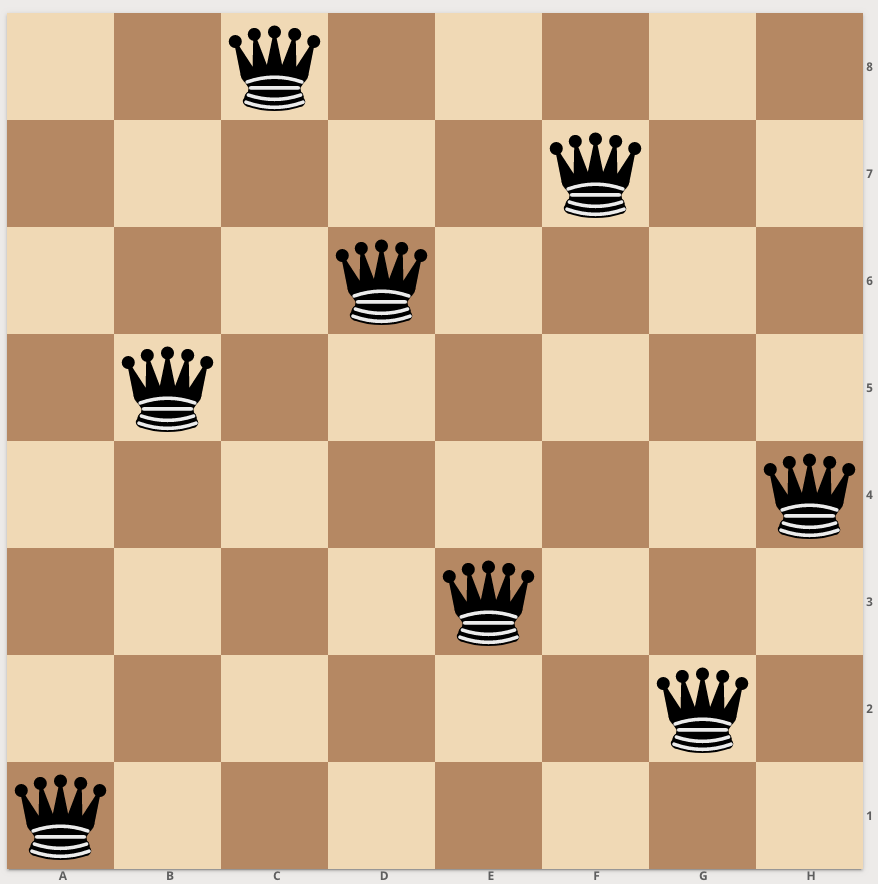

In [20]:
display.Image('images/n_queens_placement.png', width=300)

In [21]:
def queen_valid(state,new_queen_j,new_queen_i): 
    vertical_check = new_queen_j not in state 
    if not vertical_check:
        return False
    main_diagonal = new_queen_i - new_queen_j
    anti_diagonal = new_queen_i + new_queen_j 
    other_queens = state[:N - state.count(None)] 
    for other_queen_i,other_queen_j in enumerate(other_queens):
        if main_diagonal == other_queen_i - other_queen_j: 
            return False
        if anti_diagonal == other_queen_i + other_queen_j: 
            return False
    return True 

In [22]:
def expand_state(state):
    states = []
    avaliable_places = state.count(None) 
    if not avaliable_places:
        return []
    new_queen_i = N - avaliable_places 
    for new_queen_j in range(N): 
        if queen_valid(state,new_queen_j,new_queen_i):
            new_state = list(state)
            new_state[new_queen_i] = new_queen_j 
            states.append(tuple(new_state))
    return states

In [23]:
def search(initial_state, alg):
    visited = {initial_state}
    states_queue = deque([initial_state])
    while states_queue:
        state_to_expand = states_queue.popleft()
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if next_state.count(None) == 0:
                    return next_state
                visited.add(next_state)
                if alg == 'dfs':
                    states_queue.appendleft(next_state)
                elif alg == 'bfs':
                    states_queue.append(next_state)

In [24]:
N = 8
initial_state = (None,) * N
queens = search(initial_state, alg='dfs')
queens

(7, 3, 0, 2, 5, 1, 6, 4)

## Поставување кралици на шаховска табла
#### (Втор начин)

Распоредете 8 кралици на 8x8 шаховска табла така што кралиците нема да се напаѓаат.

In [25]:
from collections import deque

In [26]:
def valid(state,x,y):
    if 0 > x >= 8 or 0 > y >= 8: 
        return False
    main = x + y
    anti = x - y
    if state[x][y] == 1: 
        return False
    for i,row in enumerate(state):
        for j,column in enumerate(row):
            if state[i][j] == 1:
                if i == x or j == y:
                    return False
                main_temp = i + j
                anti_temp = i - j
                if main_temp == main or anti_temp == anti: 
                    return False
    return True              

In [27]:
def expand_state_queens(state):
    states = []
    matrix = [list(row) for row in state]
    for i,row in enumerate(matrix):
        for j,column in enumerate(row):
            if valid(matrix,i,j):
                new_matrix = [list(row) for row in state]
                new_matrix[i][j] = 1
                states.append(tuple(map(tuple, new_matrix)))
    return states

In [28]:
def end(state):
    cnt = 0
    end_matrix = [list(row) for row in state]
    for i,row in enumerate(end_matrix):
        for j,column in enumerate(row):
            if end_matrix[i][j] == 1:
                cnt = cnt + 1
    if cnt == 8:
        return True

In [29]:
def search(initial_state, alg):
    visited = {initial_state}
    states_queue = deque([initial_state])
    while states_queue:
        state_to_expand = states_queue.popleft()
        for next_state in expand_state_queens(state_to_expand):
            if next_state not in visited:
                if end(next_state):
                    return next_state
                visited.add(next_state)
                if alg == 'dfs':
                    states_queue.appendleft(next_state)
                elif alg == 'bfs':
                    states_queue.append(next_state)

In [30]:
start = ((0,0,0,0,0,0,0,0),(0,0,0,0,0,0,0,0),(0,0,0,0,0,0,0,0),(0,0,0,0,0,0,0,0),(0,0,0,0,0,0,0,0),(0,0,0,0,0,0,0,0),(0,0,0,0,0,0,0,0),(0,0,0,0,0,0,0,0))

In [31]:
%%time
queens_matrix = search(start, alg = 'dfs')

CPU times: total: 406 ms
Wall time: 388 ms


In [32]:
queens_matrix

((0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 1, 0),
 (0, 1, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 1, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 1))

## Плочки
Имате задача да создадете вештачка интелигенција која ќе знае да ја изигра играта `Плочки` во најкраток број потези. Еве [упатства](https://en.wikipedia.org/wiki/15_puzzle) за играта.

Плодот од вашиот труд треба да биде низа од потези како да се реши дадена табла.

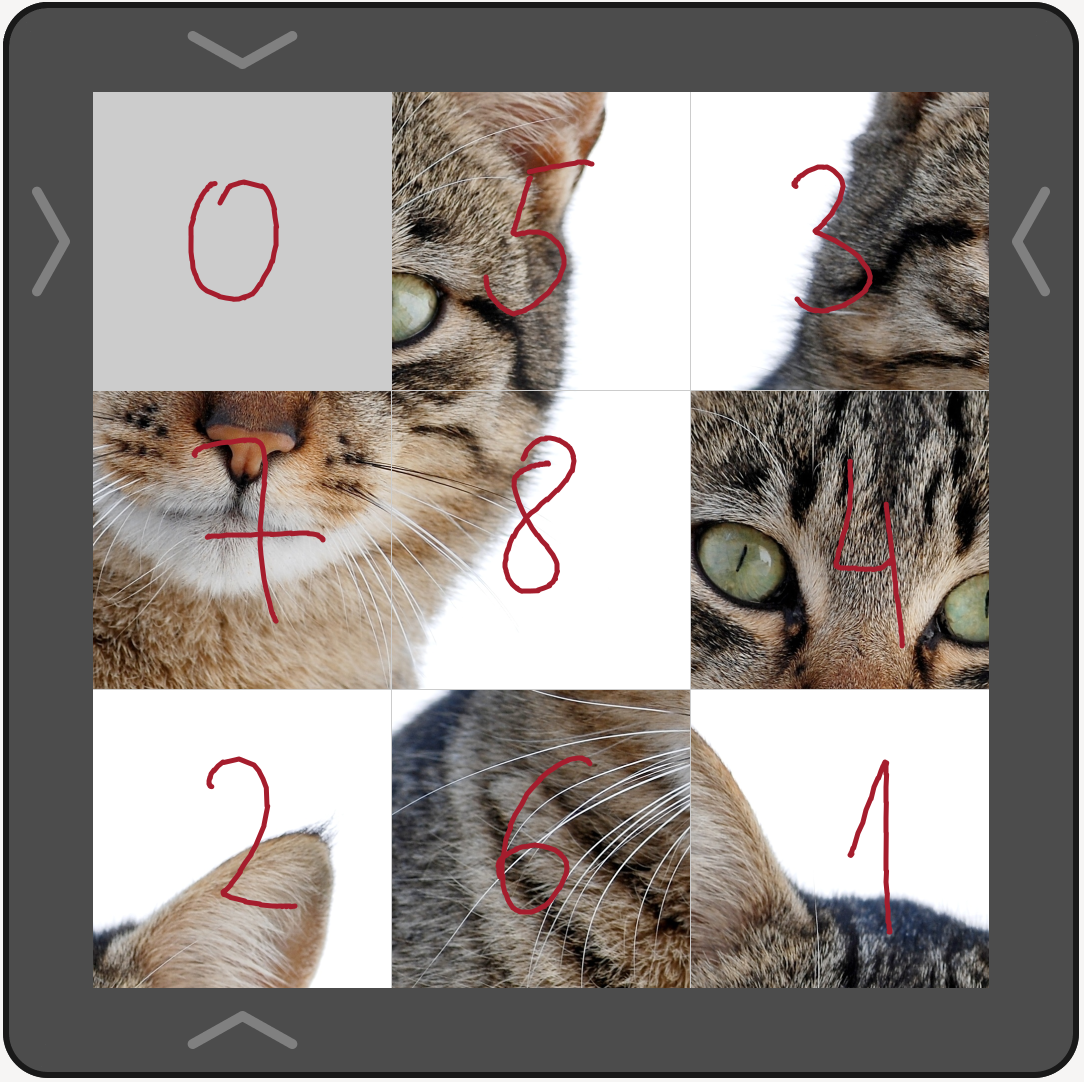

In [33]:
display.Image('images/tiles_unsolved_annotated.png', width=300)

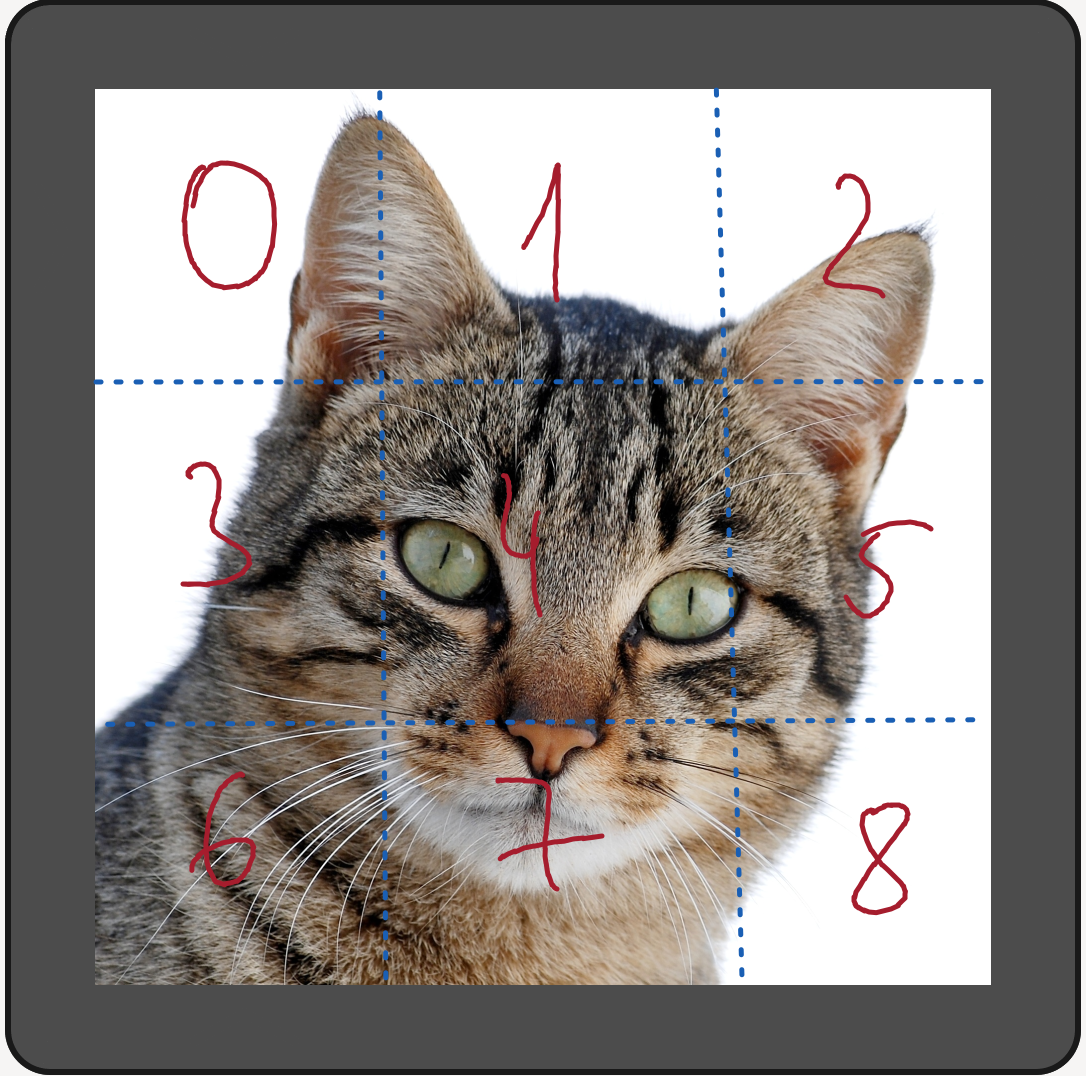

In [34]:
display.Image('images/tiles_solved_annotated.png', width=300)

In [35]:
g = '053784261'

In [36]:
LEGAL_MOVES = {
    0: [1, 3], 
    1: [0, 2, 4],
    2: [1, 5],
    3: [0, 4, 6],
    4: [1, 3, 5, 7],
    5: [2, 4, 8],
    6: [3, 7],
    7: [4, 6, 8],
    8: [5, 7],
} 

In [37]:
def end(state):
    if state == '012345678':
        return True

In [38]:
def expand_state_tiles(state):
    states = []
    free_space = state.find('0') 
    for swap_tile in LEGAL_MOVES[free_space]: 
        new_state = list(state)
        new_state[free_space] = state[swap_tile] 
        new_state[swap_tile] = state[free_space]
        new_state_con = ''.join(new_state) 
        states.append(new_state_con)
    return states        

In [39]:
def search(initial_state, alg):
    visited = {initial_state}
    queue = deque([[initial_state]])
    c = 0
    while queue:
        c += 1
        vertex_list = queue.popleft()
        state_to_expand = vertex_list[-1]
        for next_state in expand_state_tiles(state_to_expand):
            if next_state not in visited:
                if end(next_state):
                    return vertex_list + [next_state], c
                visited.add(next_state)
                if alg == 'dfs':
                    queue.appendleft(vertex_list + [next_state])
                elif alg == 'bfs':
                    queue.append(vertex_list + [next_state])

In [40]:
search(g,alg = 'bfs')

(['053784261',
  '503784261',
  '530784261',
  '534780261',
  '534708261',
  '534768201',
  '534768021',
  '534068721',
  '534608721',
  '534628701',
  '534628710',
  '534620718',
  '534602718',
  '534612708',
  '534612078',
  '534012678',
  '034512678',
  '304512678',
  '314502678',
  '314052678',
  '014352678',
  '104352678',
  '140352678',
  '142350678',
  '142305678',
  '102345678',
  '012345678'],
 143204)

## Проблем на фармерот

Предложете соодветна репрезентација и напишете ги потребните функции во Python за да се реши следниот проблем за кој почетната состојба е прикажана на сликата. Потребно е да се пренесат зелката, јарето, волкот и фармерот од источната страна на западната страна на реката. Само фармерот го вози чамецот. Во чамецот има простор за двајца патници: фармерот и уште еден патник.

Ограничувања: Доколку останат сами (без присуство на фармерот):
- Јарето ја јаде зелката
- Волкот го јаде јарето

Вашиот код треба да има само еден повик на функција за приказ на стандарден излез (print) со кој ќе ја вратите секвенцата од позиции на актерите која одговара на секвенцата на движења со која сите актери ќе бидат пренесени на западната страна на реката.

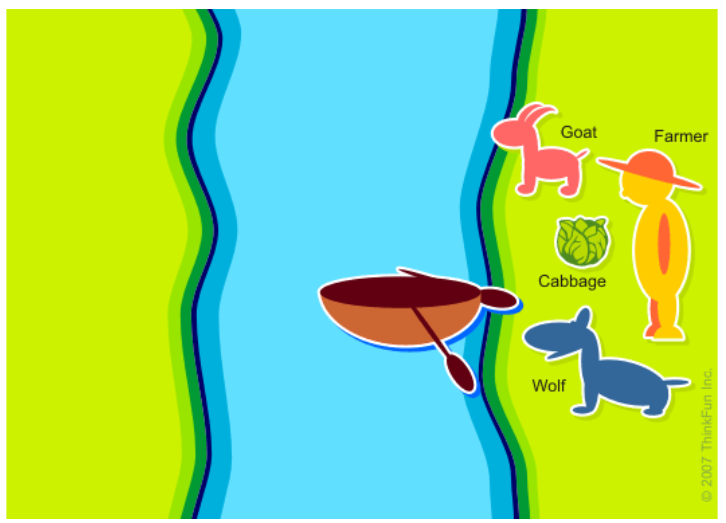

In [41]:
display.Image('images/animal_crossing.png', width=300)

In [42]:
from collections import deque

In [43]:
def valid(state):
    wolf, lamb, cabbage, boat, farmer = state
    if wolf == lamb and farmer != wolf: 
        return False
    elif lamb == cabbage and farmer != cabbage: 
        return False
    else:
        return True 

In [44]:
def expand_state_farm(state):
    states = []
    for i in range(len(state)): 
        if state[i] == state[3]:
            new_state = list(state)
            new_state[4] = 1 - new_state[4] 
            new_state[3] = 1 - new_state[3]
            new_state[i] = new_state[3] 
            if valid(state):
                states.append(tuple(new_state))
    return states                

In [45]:
def search_path(initial_state, goal_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_state_farm(state_to_expand):
            if next_state not in visited:
                if next_state == goal_state:
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []    

In [46]:
initial_state = (1,1,1,1,1)
goal_state = (0,0,0,0,0)

In [47]:
search_path(initial_state,goal_state)

[(1, 1, 1, 1, 1),
 (1, 0, 1, 0, 0),
 (1, 0, 1, 1, 1),
 (0, 0, 1, 0, 0),
 (0, 1, 1, 1, 1),
 (0, 1, 0, 0, 0),
 (0, 1, 0, 1, 1),
 (0, 0, 0, 0, 0)]

## BURAGO колички 

На квадратна табла со димензии 5x5, во првата колона се поставени 5 колички BURAGO. Количките треба да се преместат во последната колона, но во обратен редослед. Тоа значи дека количката i што се наоѓа на почетна позиција(i, 1), мора да се најде на крајната позиција 5-(i-1), 5). При секој чекор на поместување, секоја од количките може да се помести за едно поле во лево, десно, горе, долу или да остане на истата позиција. Доколку во тековниот чекор некоја количка не се помести од својата тековна позиција, една од соседните колички (но само една) може да ја прескокне. Две колички не можат едновремено да се најдат на исто поле.

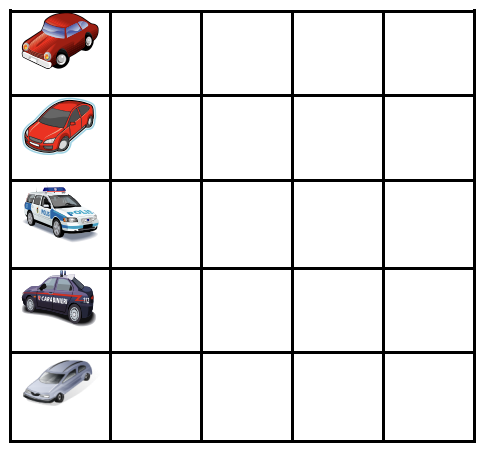

In [48]:
display.Image('images/burago_start_state.png', width=300)

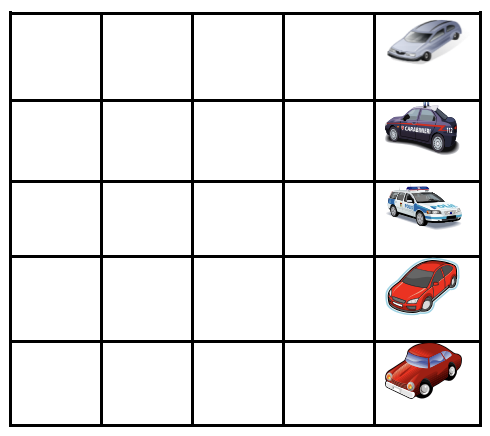

In [49]:
display.Image('images/burago_end_state.png', width=300)

In [50]:
def limits(x,y):
    if 0 <= x <= 3 and 0 <= y <= 3:
        return True
    else:
        return False

In [51]:
def valid(state,x,y):
    if limits(x,y):
        if state[x][y] == 0:
            return True

In [52]:
def find_car_1(state):
    matrix_state = [list(row) for row in state]
    for i,row in enumerate(matrix_state):
        for j,column in enumerate(row):
            if matrix_state[i][j] == 1:
                return i,j
    return (0,0)

In [53]:
def find_car_2(state):
    matrix_state = [list(row) for row in state]
    for i,row in enumerate(matrix_state):
        for j,column in enumerate(row):
            if matrix_state[i][j] == 2:
                return i,j
    return (0,0)

In [54]:
def find_car_3(state):
    matrix_state = [list(row) for row in state]
    for i,row in enumerate(matrix_state):
        for j,column in enumerate(row):
            if matrix_state[i][j] == 3:
                return i,j
    return (0,0)

In [55]:
def find_car_4(state):
    matrix_state = [list(row) for row in state]
    for i,row in enumerate(matrix_state):
        for j,column in enumerate(row):
            if matrix_state[i][j] == 4:
                return i,j
    return (0,0)

In [56]:
def expand_state_burago(state):
    states = []
    x,y = find_car_1(state)
    w,z = find_car_2(state)
    m,n = find_car_3(state)
    p,q = find_car_4(state)
    moves1 = [(1,0),(0,1),(-1,0),(0,-1),(0,0)]
    moves2 = [(0,1),(0,-1),(0,0),(1,0),(-1,0)]
    moves3 = [(0,-1),(-1,0),(1,0),(0,0),(0,1)]
    moves4 = [(0,0),(1,0),(0,1),(-1,0),(0,-1)]
    for (dx,dy),(dw,dz),(dm,dn),(dp,dq) in zip(moves1,moves2,moves3,moves4):
        new_state = [list(row) for row in state]
        new_x = x + dx
        new_y = y + dy
        new_w = w + dw
        new_z = z + dz
        new_m = m + dm
        new_n = n + dn
        new_p = p + dp
        new_q = q + dq
        if valid(new_state,new_x,new_y):
            new_state = [list(row) for row in state]
            new_state[new_x][new_y] = 1
            new_state[x][y] = 0
            states.append(tuple(map(tuple, new_state)))
        if valid(new_state,new_w,new_z):
            new_state = [list(row) for row in state]
            new_state[new_w][new_z] = 2
            new_state[w][z] = 0
            states.append(tuple(map(tuple, new_state)))
        if valid(new_state,new_m,new_n):
            new_state = [list(row) for row in state]
            new_state[new_m][new_n] = 3
            new_state[m][n] = 0
            states.append(tuple(map(tuple, new_state)))
        if valid(new_state,new_p,new_q):
            new_state = [list(row) for row in state]
            new_state[new_p][new_q] = 4
            new_state[p][q] = 0
            states.append(tuple(map(tuple, new_state)))
    return states

In [57]:
BURAGO = ((1,0,0,0),(2,0,0,0),(3,0,0,0),(4,0,0,0))
END = ((0,0,0,4),(0,0,0,3),(0,0,0,2),(0,0,0,1))

In [58]:
def search_path(initial_state, goal_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_state_burago(state_to_expand):
            if next_state not in visited:
                if next_state == goal_state:
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [59]:
search_path(BURAGO,END)

[((1, 0, 0, 0), (2, 0, 0, 0), (3, 0, 0, 0), (4, 0, 0, 0)),
 ((1, 0, 0, 0), (0, 2, 0, 0), (3, 0, 0, 0), (4, 0, 0, 0)),
 ((0, 0, 0, 0), (1, 2, 0, 0), (3, 0, 0, 0), (4, 0, 0, 0)),
 ((0, 0, 0, 0), (1, 0, 2, 0), (3, 0, 0, 0), (4, 0, 0, 0)),
 ((0, 0, 0, 0), (0, 1, 2, 0), (3, 0, 0, 0), (4, 0, 0, 0)),
 ((0, 0, 0, 0), (0, 0, 2, 0), (3, 1, 0, 0), (4, 0, 0, 0)),
 ((0, 0, 0, 0), (0, 0, 2, 0), (3, 0, 0, 0), (4, 1, 0, 0)),
 ((0, 0, 0, 0), (0, 0, 2, 0), (3, 0, 0, 0), (4, 0, 1, 0)),
 ((0, 0, 0, 0), (0, 0, 2, 0), (3, 0, 0, 0), (4, 0, 0, 1)),
 ((0, 0, 0, 0), (0, 0, 2, 0), (3, 0, 0, 0), (0, 4, 0, 1)),
 ((0, 0, 0, 0), (0, 0, 2, 0), (3, 0, 0, 0), (0, 0, 4, 1)),
 ((0, 0, 0, 0), (0, 0, 2, 0), (0, 3, 0, 0), (0, 0, 4, 1)),
 ((0, 0, 0, 0), (0, 0, 2, 0), (0, 0, 3, 0), (0, 0, 4, 1)),
 ((0, 0, 0, 0), (0, 0, 2, 0), (0, 0, 0, 3), (0, 0, 4, 1)),
 ((0, 0, 0, 0), (0, 0, 2, 3), (0, 0, 0, 0), (0, 0, 4, 1)),
 ((0, 0, 0, 0), (0, 0, 0, 3), (0, 0, 2, 0), (0, 0, 4, 1)),
 ((0, 0, 0, 0), (0, 0, 0, 3), (0, 0, 0, 2), (0, 0, 4, 1)

## Распределба на сензори 

Целта е да се постават сензори од четири различни производители (означени како 1, 2, 3 и 4) на решетка. Решетката се претставува како 2D матрица каде што 0 означува празна клетка, а другите броеви (1-4) претставуваат сензори од специфични производители.

Притоа треба да бидат исполнети следните ограничувања:
- Секој ред и секоја колона може да содржи само еден сензор од секој производител.
- Сензорите не можат да бидат поставени во ист ред или колона со друг сензор од истиот производител.

In [60]:
start = ((0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0))
N = 4

In [61]:
def end(state):
    matrix_state = [list(row) for row in state]
    count = 0
    for i,row in enumerate(matrix_state):
        for j,column in enumerate(row):
            if matrix_state[i][j] == 0:
                count = count + 1
    if count == 0:
        return True
    else:
        return False

In [62]:
def find_next_zero(state): 
    matrix_state = [list(row) for row in state]
    for i,row in enumerate(matrix_state):
        for j,column in enumerate(row):
            if matrix_state[i][j] == 0:
                return i,j

In [63]:
def valid(manuvalue,state,x,y):
    matrix_state = [list(row) for row in state]
    if 0 > x > 3 and 0 > y > 3: 
        return False
    for i in range(N):
        if matrix_state[x][i] == manuvalue or matrix_state[i][y] == manuvalue: 
            return False
    return True

In [64]:
def expand_state_sensors(state):
    states = []
    manufacturer = [1,2,3,4]
    x,y = find_next_zero(state) 
    for m in manufacturer:
        if valid(m,state,x,y):
            new_state = [list(row) for row in state]
            new_state[x][y] = m 
            states.append(tuple(map(tuple, new_state)))
    return states        

In [65]:
def search(initial_state, alg):
    visited = {initial_state}
    states_queue = deque([initial_state])
    while states_queue:
        state_to_expand = states_queue.popleft()
        for next_state in expand_state_sensors(state_to_expand):
            if next_state not in visited:
                if end(next_state):
                    return next_state
                visited.add(next_state)
                if alg == 'dfs':
                    states_queue.appendleft(next_state)
                elif alg == 'bfs':
                    states_queue.append(next_state)

In [66]:
sensors = search(start, alg = 'dfs')

In [67]:
sensors

((4, 3, 2, 1), (3, 4, 1, 2), (2, 1, 4, 3), (1, 2, 3, 4))

## Поставување коњи на шаховска табла

Распоредете што е можно повеќе коњи на NxN шаховска табла така што коњите нема да се напаѓаат.

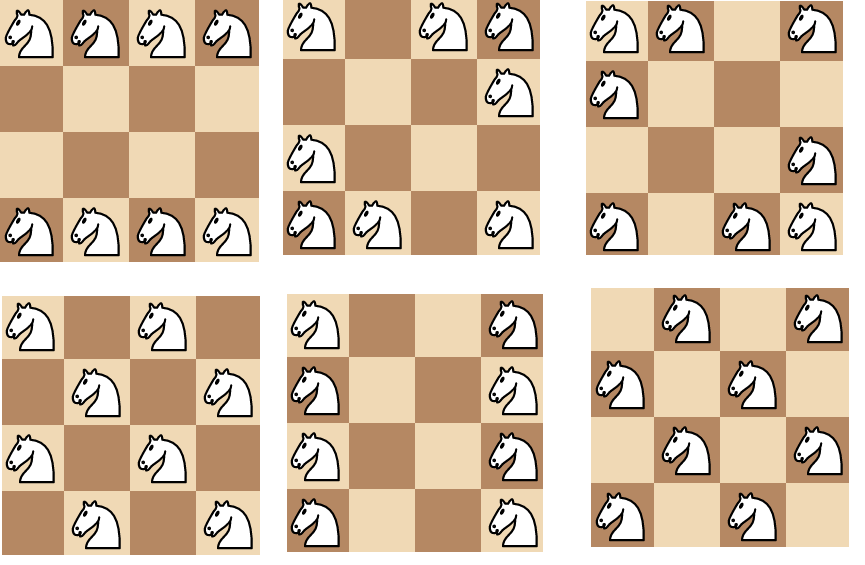

In [68]:
display.Image('images/knight_placing.png', width=300)

In [69]:
from collections import deque

In [70]:
def end(state):
    matrix = [list(row) for row in state]
    cnt = 0
    for i,row in enumerate(matrix):
        for j,column in enumerate(row):
            if matrix[i][j] == 1:
                cnt = cnt + 1
    if cnt % 2 == 0:
        if cnt == (N*N)/2:
            return True
    elif cnt % 2 != 0:
        if cnt == ((N*N)+1)/2:
            return True
    return False

In [71]:
def valid(x,y,state):
    if 0 > x >= N or 0 > y >= N:
        return False
    if state[x][y] == 1:
        return False
    moves = [(-1,2),(2,-1),(-2,1),(1,-2),(2,1),(1,2),(-1,-2),(-2,-1)]
    for m,n in moves:
        new_x = m + x
        new_y = n + y 
        if 0 <= new_x < N and 0 <= new_y < N and state[new_x][new_y] == 1:
            return False
    return True

In [72]:
def expand_state_knight(state):
    states = []
    matrix = [list(row) for row in state]
    for i,row in enumerate(matrix):
        for j,column in enumerate(row):
            if valid(i,j,matrix):
                matrix = [list(row) for row in state]
                matrix[i][j] = 1
                states.append(tuple(map(tuple, matrix)))
    return states

In [73]:
N = 5
start = ((0,0,0,0,0),(0,0,0,0,0),(0,0,0,0,0),(0,0,0,0,0),(0,0,0,0,0))

In [74]:
def search(initial_state, alg):
    visited = {initial_state}
    states_queue = deque([initial_state])
    while states_queue:
        state_to_expand = states_queue.popleft()
        for next_state in expand_state_knight(state_to_expand):
            if next_state not in visited:
                if end(next_state):
                    return next_state
                visited.add(next_state)
                if alg == 'dfs':
                    states_queue.appendleft(next_state)
                elif alg == 'bfs':
                    states_queue.append(next_state)

In [75]:
knights = search(start,alg = 'dfs')

In [76]:
knights

((1, 0, 1, 0, 1),
 (0, 1, 0, 1, 0),
 (1, 0, 1, 0, 1),
 (0, 1, 0, 1, 0),
 (1, 0, 1, 0, 1))

## Судоку

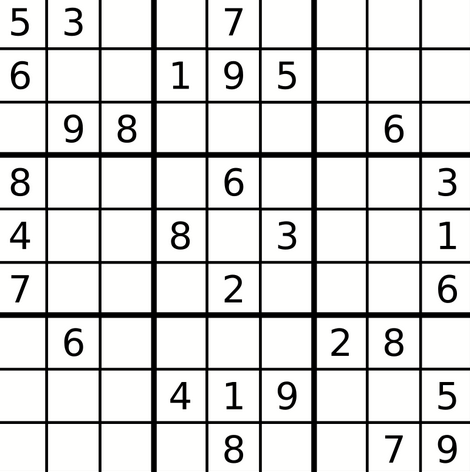

In [77]:
display.Image('images/sudoku.png', width=300)

In [78]:
from collections import deque

In [79]:
def find_next_zero(state):
    for i,row in enumerate(state):
        for j,column in enumerate(row):
            if state[i][j] == 0:
                return i,j

In [80]:
def is_number_in_square(state, row, col, s):
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)

    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if state[i][j] == s:
                return True

In [81]:
def valid(state,x,y,s):
    if 0 > x > 8 or 0 > y > 9:
        return False
    for i in range(8):
        if state[i][y] == s or state[x][i] == s:
            return False
    if is_number_in_square(state,x,y,s):
        return False
    return True

In [82]:
def end(state):
    matrix_state = [list(row) for row in state]
    count = 0
    for i,row in enumerate(matrix_state):
        for j,column in enumerate(row):
            if matrix_state[i][j] == 0:
                count = count + 1
    if count == 0:
        return True
    else:
        return False

In [83]:
def expand_state_sudoku(state):
    states = []
    matrix = [list(row) for row in state]
    x,y = find_next_zero(matrix)
    sudoku = [1,2,3,4,5,6,7,8,9] 
    for s in sudoku:
        if valid(state,x,y,s): 
            new_state = [list(row) for row in state]
            new_state[x][y] = s
            states.append(tuple(map(tuple, new_state)))
    return states

In [84]:
def search(initial_state, alg):
    visited = {initial_state}
    states_queue = deque([initial_state])
    while states_queue:
        state_to_expand = states_queue.popleft()
        for next_state in expand_state_sudoku(state_to_expand):
            if next_state not in visited:
                if end(next_state):
                    return next_state
                visited.add(next_state)
                if alg == 'dfs':
                    states_queue.appendleft(next_state)
                elif alg == 'bfs':
                    states_queue.append(next_state)

In [85]:
start_state = (
    (5, 3, 0, 0, 7, 0, 0, 0, 0),
    (6, 0, 0, 1, 9, 5, 0, 0, 0),
    (0, 9, 8, 0, 0, 0, 0, 6, 0),
    (8, 0, 0, 0, 6, 0, 0, 0, 3),
    (4, 0, 0, 8, 0, 3, 0, 0, 1),
    (7, 0, 0, 0, 2, 0, 0, 0, 6),
    (0, 6, 0, 0, 0, 0, 2, 8, 0),
    (0, 0, 0, 4, 1, 9, 0, 0, 5),
    (0, 0, 0, 0, 8, 0, 0, 7, 9),
)

In [86]:
solved_sudoku = search(start_state,alg = 'dfs')

In [87]:
solved_sudoku

((5, 3, 4, 6, 7, 8, 9, 1, 2),
 (6, 7, 2, 1, 9, 5, 3, 4, 8),
 (1, 9, 8, 3, 4, 2, 5, 6, 7),
 (8, 5, 9, 7, 6, 1, 4, 2, 3),
 (4, 2, 6, 8, 5, 3, 7, 9, 1),
 (7, 1, 3, 9, 2, 4, 8, 5, 6),
 (9, 6, 1, 5, 3, 7, 2, 8, 4),
 (2, 8, 7, 4, 1, 9, 6, 3, 5),
 (3, 4, 5, 2, 8, 6, 1, 7, 9))

## Ѕвезди

Предложете соодветна репрезентација и напишете ги потребните функции во Python за да се реши следниот проблем за кој една можна почетна состојба е прикажана на сликата. 

На шаховска табла 8x8 поставени се еден коњ, еден ловец и три ѕвезди. Движењето на коњите на шаховската табла е во облик на буквата Г: притоа, од дадена позиција можни се 8 позиции до кои даден коњ може да се придвижи, како што е прикажано на сликата (1 = горе + горе + лево, 2 = горе + горе + десно, 3 = десно + десно + горе, 4 = десно + десно + долу, 5 = долу + + долу + десно, 6 = долу + долу + лево, 7 = лево + лево + долу, 8 = лево + лево + горе).

Движењето на ловците на таблата е по дијагонала.

Целта на играта е да се соберат сите три ѕвезди. Една ѕвезда се собира доколку некоја од фигурите застане на истото поле каде што се наоѓа и ѕвездата.

Притоа, не е дозволено двете фигури да бидат позиционирани на истото поле и не е дозволено фигурите да излегуваат од таблата. Фигурите меѓусебно не се напаѓаат. Движењето на фигурите е произволно, т.е. во кој било момент може да се придвижи која било од двете фигури. Потребно е проблемот да се реши во најмал број на потези.

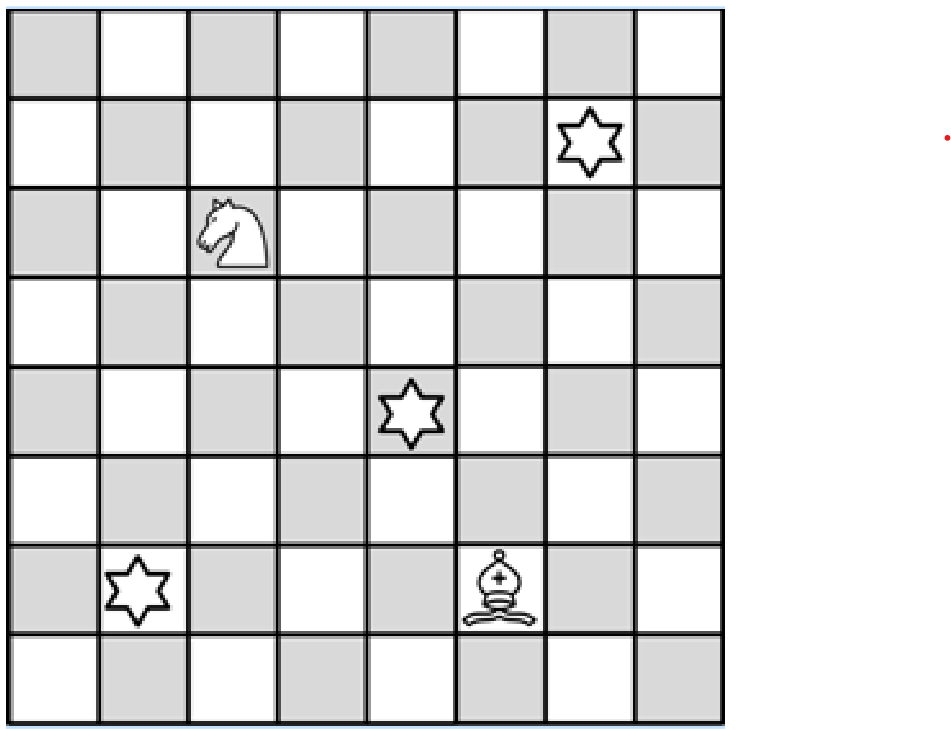

In [88]:
display.Image('images/stars.png', width=300)

In [89]:
def end(state): 
    state_matrix = [list(row) for row in state]
    count = sum(row.count(3) for row in state_matrix)
    if count == 0:
        return True

In [90]:
def limits(x,y):
    if 0 <= x <= 7 and 0 <= y <= 7:
        return True

In [91]:
def same_position(x,y,w,z): 
    if x != w and y != z:
        return True 

In [92]:
def find_knight(matrix): 
    for i, row in enumerate(matrix):
        for j, column in enumerate(row):
            if matrix[i][j] == 1:
                return (i,j)
    return (0,0)

In [93]:
def find_bishop(matrix):
    for i, row in enumerate(matrix):
        for j, column in enumerate(row):
            if matrix[i][j] == 2:
                return (i,j)
    return (0,0)

In [94]:
def expand_state(state):
    states = []
    new_state = [list(row) for row in state]
    moves_bishop = [(1,1),(1,-1),(-1,1),(-1,-1),(1,1),(1,-1),(-1,1),(-1,-1)] 
    moves_knight = [(1,2),(2,1),(-1,-2),(-2,-1),(-1,2),(2,-1),(-2,1),(1,-2)]
    x, y = find_knight(new_state)
    w, z = find_bishop(new_state)
    for (dx,dy),(dw,dz) in zip(moves_knight,moves_bishop):
        new_state = [list(row) for row in state]
        new_x = x + dx
        new_y = y + dy
        new_w = w + dw
        new_z = z + dz
        if same_position(new_x,new_y,new_w,new_z):
            if limits(new_x,new_y):
                new_state[x][y] = 0
                new_state[new_x][new_y] = 1
            else:
                new_state[x][y] = 1
            if limits(new_w,new_z):
                new_state[w][z] = 0
                new_state[new_w][new_z] = 2
            else:
                new_state[w][z] = 2
            states.append(tuple(map(tuple,new_state)))

    return states

In [95]:
def search_path(initial_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]       
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if end(next_state):
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [96]:
m = ((0,0,0,0,0,0,0,0),
     (0,0,0,0,0,0,3,0),
     (0,0,1,0,0,0,0,0),
     (0,0,0,0,0,0,0,0),
     (0,0,0,0,3,0,0,0),
     (0,0,0,0,0,0,0,0),
     (0,3,0,0,0,2,0,0),
     (0,0,0,0,0,0,0,0)) 

In [97]:
def visualise_path(path):
    for states in zip(path, path[1:]):
        old_state, new_state = states
        for row in new_state:
            print(' '.join(map(str,row)))
        print()

In [98]:
path = search_path(m)
visualise_path(path)

0 1 0 0 0 0 0 0
0 0 0 0 0 0 3 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 3 0 0 0
0 0 0 0 2 0 0 0
0 3 0 0 0 0 0 0
0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0
0 0 0 0 0 0 3 0
1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 3 0 0 0
0 0 0 0 0 0 0 0
0 3 0 2 0 0 0 0
0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0
0 0 0 0 0 0 3 0
1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 3 0 0 0
0 0 0 0 0 0 0 0
0 3 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 0 0 0
0 0 0 0 0 0 3 0
0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0
0 0 0 0 3 0 0 0
0 0 0 0 0 0 0 0
0 3 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 0 0 0
0 0 0 0 0 0 3 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0
0 3 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 0 0 0
0 0 0 0 0 0 3 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0
0 3 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 0 0 0
0 0 0 0 0 0 3 0
0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 2 0 0 0 0 0 0
0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0
0

## Истражувач

Предложете соодветна репрезентација и напишете ги потребните функции во Python за да се реши следниот проблем за кој една можна почетна состојба е прикажана на сликата.

Потребно е човечето безбедно да дојде до куќичката. Човечето може да се придвижува на кое било соседно поле хоризонтално или вертикално. 

Пречките 1 и 2 се подвижни, при што и двете пречки се движат вертикално. Секоја од пречките се придвижува за едно поле во соодветниот правец и насока со секое придвижување на човечето. 

Притоа, пречката 1 на почетокот се движи надолу, додека пречката 2 на почетокот се движи нагоре. Пример за положбата на пречките после едно придвижување на човечето надесно е прикажан на десната слика. 

Кога некоја пречка ќе дојде до крајот на таблата при што повеќе не може да се движи во насоката во која се движела, го менува движењето во спротивната насока. 
Доколку човечето и која било од пречките се најдат на исто поле човечето ќе биде уништено.

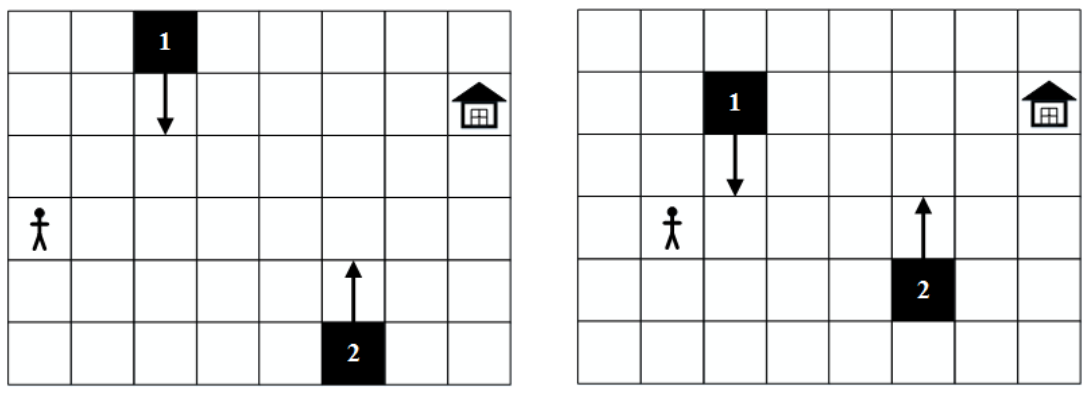

In [99]:
display.Image('images/explorer.png', width=500)

In [100]:
def limits(i,j):
    if i <= 5 and i >= 0 and j <= 7 and j >= 0:
        return True

In [101]:
def find_obstacle1(state):
    for i,row in enumerate(state):
        for j,column in enumerate(row):
            if state[i][j] == 2:
                return i,j
    return (0,0)  

In [102]:
def find_obstacle2(state):
    for i,row in enumerate(state):
        for j,column in enumerate(row):
            if state[i][j] == 3:
                return i,j
    return (0,0)

In [103]:
def same_position(state,x,y):
    i,j = find_obstacle1(state)
    m,n = find_obstacle2(state)
    if (x != i or y != j) and (x != m or y != n):
        return True  

In [104]:
def find_explorer(state):
    for i,row in enumerate(state):
        for j,column in enumerate(row):
            if state[i][j] == 1:
                return i,j
    return (0,0)  

In [105]:
def end(state):
    i,j = find_explorer(state)
    if i == 1 and j == 7:
        return True 

In [106]:
def expand_state(state):
    states = []
    new_state = [list(row) for row in state]
    moves = [(1,0),(0,1),(-1,0),(0,-1)]
    moves_ob1 = [(1,0),(1,0),(1,0),(1,0)]
    moves_ob2 = [(-1,0),(-1,0),(-1,0),(-1,0)]
    x,y = find_explorer(new_state)
    w,z = find_obstacle1(new_state)
    m,n = find_obstacle2(new_state)
    for (dx,dy),(dw,dz),(dm,dn) in zip(moves,moves_ob1,moves_ob2):
        new_state = [list(row) for row in state]
        new_x = x + dx
        new_y = y + dy
        new_w = w + dw
        new_z = z + dz
        new_m = m + dm
        new_n = n + dn
        if limits(new_x,new_y) and same_position(new_state,new_x,new_y):
            new_state[x][y] = 0
            new_state[new_x][new_y] = 1
        if limits(new_w,new_z) and limits(new_m,new_n):
            new_state[w][z] = 0
            new_state[m][n] = 0
            new_state[new_w][new_z] = 2
            new_state[new_m][new_n] = 3
        
        states.append(tuple(map(tuple,new_state)))

    return states

In [107]:
def search_path(initial_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]       
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if end(next_state):
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [108]:
def visualise_path(path):
    for states in zip(path, path[1:]):
        old_state, new_state = states
        for row in new_state:
            print(' '.join(map(str,row)))
        print()

In [109]:
Map = ((0,0,2,0,0,0,0,0),(0,0,0,0,0,0,0,4),(0,0,0,0,0,0,0,0),(1,0,0,0,0,0,0,0),(0,0,0,0,0,0,0,0),(0,0,0,0,0,3,0,0))

In [110]:
path = search_path(Map)
visualise_path(path)

0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 4
0 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0
0 0 0 0 0 3 0 0
0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 4
0 0 2 0 0 0 0 0
0 0 1 0 0 3 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 4
0 0 0 0 0 3 0 0
0 0 2 1 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0
0 0 0 0 0 3 0 4
0 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0
0 0 2 0 0 0 0 0
0 0 0 0 0 0 0 0

0 0 0 0 0 3 0 0
0 0 0 0 0 0 0 4
0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 3 0 0
0 0 0 0 0 0 0 4
0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 3 0 0
0 0 0 0 0 0 0 4
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 3 0 0
0 0 0 0 0 0 0 4
0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 3 0 0
0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0



## Molecules Forming H2O
Предложете соодветна репрезентација и напишете ги потребните функции во Python за да се реши следниот проблем за кој една можна почетна состојба е прикажана на сликата на следниот слајд.

На табла 7x9 поставени се три атоми (внимавајте, двата H-атоми се различни: едниот има линк во десно, а другиот има линк во лево). Полињата обоени во сива боја претставуваат препреки.

Играчот може да ја започне играта со избирање на кој било од трите атоми. 

Играчот во секој момент произволно избира точно еден од трите атоми и го „турнува“ тој атом во една од четирите насоки: горе, долу, лево или десно. 

Движењето на „турнатиот“ атом продолжува во избраната насока се’ додека атомот не „удри“ во препрека или во некој друг атом (атомот секогаш застанува на првото поле што е соседно на препрека или на друг атом во соодветната насока).

Не е возможно ротирање на атомите (линковите на атомите секогаш ќе бидат поставени како што се на почетокот на играта). Исто така, не е дозволено атомите да излегуваат од таблата.

Целта на играта е атомите да се доведат во позиција во која ја формираат „молекулата“ прикажана десно од таблата. Играта завршува во моментот кога трите атоми ќе бидат поставени во бараната позиција, во произволни три соседни полиња од таблата.

Потребно е проблемот да се реши во најмал број на потези.

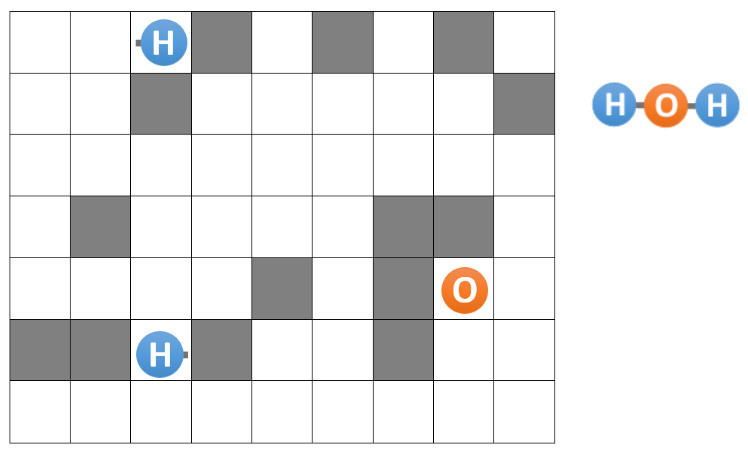

In [111]:
display.Image('images/molecule.png', width=300)

In [112]:
def limits(x,y):
    if x <= 6 and x >= 0 and y <= 8 and y >= 0:
        return True

In [113]:
def obstacle(x,y):
    count = 0
    obstacles = [(0, 5), (1, 3), (1, 5), (2, 1), (3, 0), (3, 5), (4, 4), (5, 0), (6, 3), (6, 4), (6, 5), (7, 0), (7, 3), (8, 1)] 
    if (y,x) not in obstacles:
        return True

In [114]:
def same_position(x,y,w,z):
    if x != w or y != z:
        return True

In [115]:
def valid(x,y,w,z):
    if limits(x,y) and obstacle(x,y) and same_position(x,y,w,z):
        return True
    else:
        return False

In [116]:
def findRightH(state):
    matrix = [list(row) for row in state]
    for i,row in enumerate(matrix):
        for j,column in enumerate(row):
            if matrix[i][j] == 1:
                return i,j
    return (0,0)

In [117]:
def findO(state):
    matrix = [list(row) for row in state]
    for i,row in enumerate(matrix):
        for j,column in enumerate(row):
            if matrix[i][j] == 2:
                return i,j
    return (0,0)

In [118]:
def findLeftH(state):
    matrix = [list(row) for row in state]
    for i,row in enumerate(matrix):
        for j,column in enumerate(row):
            if matrix[i][j] == 3:
                return i,j
    return (0,0)

In [119]:
def end(state):
    end_matrix = [list(row) for row in state]
    x,y = findRightH(state)
    w,z = findLeftH(state)
    a,b = findO(state)
    if x == a and y == b+1 and w == a and z == b-1:
        return True

In [120]:
def expand_state(state):
    states = []
    new_state = [list(row) for row in state]
    x,y = findRightH(state)
    w,z = findO(state)
    a,b = findLeftH(state)
    
    moves = [(1,0),(0,1),(-1,0),(0,-1)]
    for (dw,dz),(dx,dy),(da,db) in zip(moves,moves,moves):
        new_state = [list(row) for row in state]
        
        new_w = w + dw
        new_z = z + dz
        new_x = x + dx
        new_y = y + dy
        new_a = a + da
        new_b = b + db

        if valid(new_x,new_y,new_w,new_z) and valid(new_x,new_y,new_a,new_b):
            new_state[x][y] = 0
            new_state[new_x][new_y] = 1
        else:
            new_state[x][y] = 1
        if valid(new_w,new_z,new_x,new_y) and valid(new_w,new_z,new_a,new_b):
            new_state[w][z] = 0
            new_state[new_w][new_z] = 2
        else:
            new_state[w][z] = 2
        if valid(new_a,new_b,new_w,new_z) and valid(new_a,new_b,new_x,new_y):
            new_state[a][b] = 0
            new_state[new_a][new_b] = 3
        else:
            new_state[a][b] = 3
        states.append(tuple(map(tuple,new_state)))

    return states

In [121]:
Table = ((0,0,1,5,0,5,0,5,0),(0,0,5,0,0,0,0,0,5),(0,0,0,0,0,0,0,0,0),(0,5,0,0,0,0,5,5,0),(0,0,0,0,5,0,5,2,0),(5,5,3,5,0,0,5,0,0),(0,0,0,0,0,0,0,0,0))

In [122]:
def search_path(initial_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]       
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if end(next_state):
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [123]:
def visualise_path(path):
    for states in zip(path, path[1:]):
        old_state, new_state = states
        for row in new_state:
            print(' '.join(map(str,row)))
        print()

In [124]:
path = search_path(Table)
visualise_path(path)

0 1 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 0 0 0 0 5 5 0
0 0 0 0 5 0 5 2 0
5 5 3 5 0 0 5 0 0
0 0 0 0 0 0 0 0 0

0 0 0 5 0 5 0 5 0
0 1 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 0 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 0 5 0 0 5 2 0
0 0 3 0 0 0 0 0 0

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 1 0 0 0 0 0 0 0
0 5 0 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 0 5 0 0 5 0 0
0 0 3 0 0 0 0 2 0

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 1 0 0 0 0 0 0
0 5 0 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 0 5 0 0 5 0 0
0 0 0 3 0 0 0 0 2

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 1 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 0 5 0 0 5 0 0
0 0 0 3 0 0 0 0 2

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 0 0 0 0 5 5 0
0 0 1 0 5 0 5 0 0
5 5 0 5 0 0 5 0 0
0 0 0 3 0 0 0 0 2

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 0 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 1 5 0 0 5 0 0
0 0 0 3 0 0 0 0 2

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 0 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 1 5 0 0 5 0 0
0 0